## This script is used to clean the database. Do not run if you don't know what you are doing.

In [14]:
import pandas as pd
from pathlib import Path

In [2]:
# combine all the csv files in the folder into a new one. They have the same structure and columns.
def combine_csv_files(folder_path: str, output_file: str) -> None:
    """
    Combine all CSV files in a folder into a single CSV file.
    Files must have the same structure and columns.
    
    Args:
        folder_path (str): Path to folder containing CSV files
        output_file (str): Path for the combined output CSV file
    """
    # Get all CSV files in folder
    folder = Path(folder_path)
    csv_files = list(folder.glob('*.csv'))
    
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in {folder}")
        
    # Read and combine all files
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)
        
    # Concatenate all dataframes
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Save combined dataframe
    combined_df.to_csv(output_file, index=False)
    print(f"Combined {len(csv_files)} files into {output_file}")

# Example usage
# combine_csv_files("path/to/csv/folder", "path/to/output.csv")



In [17]:
combine_csv_files("/Users/yuanlu/Code/youtube-top-10000-channels/data/wait_to_combine", "output.csv")

NameError: name 'combine_csv_files' is not defined

In [18]:
#load /Users/yuanlu/Desktop/output.csv
df = pd.read_csv("/Users/yuanlu/Desktop/output.csv")
df.head()
df.shape


/var/folders/zr/hp5t3xpd16b9b_vjf10dd4nm0000gn/T/ipykernel_28838/2029434604.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/yuanlu/Desktop/output.csv")


(155976, 7)

In [20]:
# delete all rows which is_valid column is False
df = df[df['is_valid'] == True]
df.head()
df.shape

(148826, 7)

In [21]:
# delete column youtube_channel_url and is_valid and error
df = df.drop(columns=['Youtube_Channel_URL', 'is_valid', 'error'])
df.shape

(148826, 4)

In [22]:
# Convert subscribers to int, handling M (millions) and K (thousands) with decimals
def convert_subscribers(value):
    try:
        if isinstance(value, (int, float)):
            return int(value)
        if 'M' in str(value):
            return int(float(str(value).replace('M', '')) * 1000000)
        elif 'K' in str(value):
            return int(float(str(value).replace('K', '')) * 1000)
        else:
            return int(float(value))
    except (ValueError, TypeError):
        return 0

df['subscribers'] = df['subscribers'].apply(convert_subscribers)
df.head()

,validated_url,channel_id,handle,subscribers
0,https://www.youtube.com/channel/UCwlVi_yLZjvQd...,UCnNR3HRoNsKNY5X5v9-ymlw,@GravityPlayyy,11600000
1,https://www.youtube.com/channel/UCwlXvXQ-SjVfM...,UCwlXvXQ-SjVfMoCxhrIi7uw,@AlAinZooUAE,6660
2,https://www.youtube.com/channel/UCwlZeLR8Bglmd...,UCwlZeLR8Bglmdoloqujw3uA,@Easterntvsamaritan,214000
3,https://www.youtube.com/channel/UCwl__IB8WFt1W...,UCwl__IB8WFt1WkWNQRTxbvQ,@christianestolhofer6471,5
4,https://www.youtube.com/channel/UCwlbtOk54XI1C...,UCwlbtOk54XI1C9rf5TgajWA,@jaisharma8032,349000


In [23]:
# rank the dataframe by subscribers in descending order
df = df.sort_values(by='subscribers', ascending=False)
df.shape

(148826, 4)

In [24]:
#save df to csv
df.to_csv("cleaned_data.csv", index=False)

In [25]:
# load cleaned_data.csv
df = pd.read_csv("cleaned_data.csv")
df.head()
df.shape

(148826, 4)

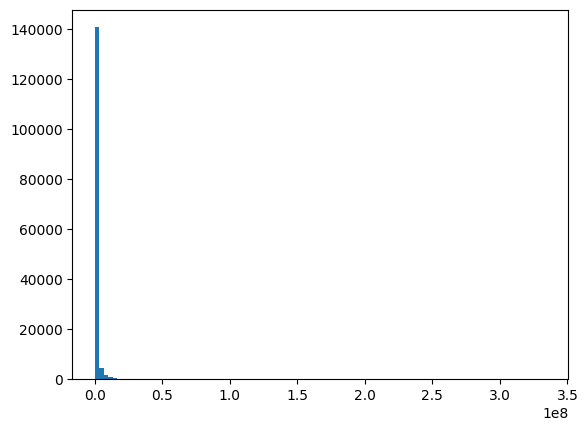

In [26]:
# analyze the subscribers distribution
df['subscribers'].describe()
# plot the subscribers distribution
import matplotlib.pyplot as plt
plt.hist(df['subscribers'], bins=100)
plt.show()

In [28]:
df[df['subscribers'] > 10000].shape[0]

88371

In [29]:
df[df['subscribers'] < 10000].shape[0]

60356

In [31]:
#only leave the channels with more than 10000 subscribers
df = df[df['subscribers'] > 10000]
df.shape
#save df to csv
df.to_csv("cleaned_data_more_than_10000.csv", index=False)

In [32]:
#load /Users/yuanlu/Desktop/output.csv
df = pd.read_csv("/Users/yuanlu/Code/youtube-top-10000-channels/src/utils/cleaned_data_more_than_10000.csv")
df.head()
df.shape

(88371, 4)

In [33]:
# for the column validated_url, at the end of the url, let's add /videos
df['validated_url'] = df['validated_url'] + '/videos'
df.head()
#save df to csv
df.to_csv("cleaned_data_more_than_10000_with_videos.csv", index=False)

In [34]:
# split a csv file into multiple files with a given number of rows
def split_csv_file(file_path: str, num_rows: int) -> None:
    df = pd.read_csv(file_path)
    for i in range(0, len(df), num_rows):
        df[i:i+num_rows].to_csv(f"split_{i//num_rows}.csv", index=False)

In [35]:
# Example usage
split_csv_file("/Users/yuanlu/Code/youtube-top-10000-channels/src/utils/cleaned_data_more_than_10000_with_videos.csv", 29500)